In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import multivariate_normal

%matplotlib inline

In [2]:
data = pd.read_csv('data_set .csv')
labels = pd.read_csv('labels.csv', delimiter=';')
android_versions = pd.read_csv('android_versions.csv', delimiter=',')
ios_versions = pd.read_csv('ios_versions.csv', delimiter=',')

data = data.merge(labels, how='left', left_on='appsflyer_id', right_on='Appsflyer_id')
data['is_fraud'] = ~data['Fraud_reasons'].isnull()
ios_app_id = 'id966165025'
android_app_id = 'ng.jiji.app'

In [3]:
android_versions['release_date'] = pd.to_datetime(android_versions['release_date'])
ios_versions['release_date'] = pd.to_datetime(ios_versions['release_date'])

In [4]:
data['install_time'] = pd.to_datetime(data['install_time'])
data['attributed_touch_time'] = pd.to_datetime(data['attributed_touch_time'])
data['tti'] = (data['install_time'] - data['attributed_touch_time']).dt.total_seconds()
data['tti_contributor1'] = (pd.to_datetime(data['install_time']) 
                             - pd.to_datetime(data['contributor_1_touch_time'], errors='coerce')).dt.total_seconds()
data['tti_contributor2'] = (pd.to_datetime(data['install_time']) 
                             - pd.to_datetime(data['contributor_2_touch_time'], errors='coerce')).dt.total_seconds()
data['tti_contributor3'] = (pd.to_datetime(data['install_time']) 
                             - pd.to_datetime(data['contributor_3_touch_time'], errors='coerce')).dt.total_seconds()
data['install_time_since_midnight_sec'] = (data['install_time'] - 
                                           pd.to_datetime(data['install_time'].dt.date)) / np.timedelta64(1, 's')

In [66]:
data.head()

,site_id,appsflyer_id,publisher,sub_site_id,date,app_id,app_version,attributed_touch_time,attributed_touch_type,operator,...,App_id,Publisher (media_source),Site_id,Fraud_reasons,is_fraud,tti,tti_contributor1,tti_contributor2,tti_contributor3,install_time_since_midnight_sec
0,0,148552020,AA,0,2017-10-17,id966165025,3006005000,2017-10-17 21:20:31,click,NaN,...,NaN,NaN,NaN,NaN,False,179.0,15986.0,NaN,NaN,77010.0
1,2588,6912501,AA,1133,2017-10-08,ng.jiji.app,3004002000,2017-10-08 17:46:52,click,MTN NG,...,NaN,NaN,NaN,NaN,False,10.0,12.0,748.0,NaN,64022.0
2,2588,142889582,AA,1813,2017-10-06,ng.jiji.app,3004002000,2017-10-06 11:00:39,click,MTN - NG,...,NaN,NaN,NaN,NaN,False,18.0,145.0,409014.0,NaN,39657.0
3,2588,491337173,AA,1813,2017-10-06,ng.jiji.app,3004002000,2017-10-06 13:38:31,click,Airtel,...,NaN,NaN,NaN,NaN,False,24.0,40.0,NaN,NaN,49135.0
4,2588,156920862,AA,1813,2017-10-06,ng.jiji.app,3004002000,2017-10-06 13:59:55,click,MTN NG,...,NaN,NaN,NaN,NaN,False,1782.0,497520.0,NaN,NaN,52177.0


In [67]:
data.columns

Index(['site_id', 'appsflyer_id', 'publisher', 'sub_site_id', 'date', 'app_id',
       'app_version', 'attributed_touch_time', 'attributed_touch_type',
       'operator', 'city', 'country_code', 'device_type',
       'contributor_1_publisher', 'contributor_1_touch_time',
       'contributor_2_publisher', 'contributor_2_touch_time',
       'contributor_3_publisher', 'contributor_3_touch_time', 'install_time',
       'language', 'os_version', 'sdk_version', 'wifi', 'Appsflyer_id',
       'App_id', 'Publisher (media_source)', 'Site_id', 'Fraud_reasons',
       'is_fraud', 'tti', 'tti_contributor1', 'tti_contributor2',
       'tti_contributor3', 'install_time_since_midnight_sec'],
      dtype='object')

In [68]:
data.T.apply(lambda x: x.nunique(), axis=1)

site_id                              6593
appsflyer_id                       461312
publisher                              47
sub_site_id                          2099
date                                   70
app_id                                  2
app_version                           117
attributed_touch_time              438661
attributed_touch_type                   2
operator                              485
city                                 3659
country_code                          157
device_type                          9794
contributor_1_publisher                47
contributor_1_touch_time           237763
contributor_2_publisher                47
contributor_2_touch_time            96778
contributor_3_publisher                47
contributor_3_touch_time            31598
install_time                       438464
language                              267
os_version                            117
sdk_version                            19
wifi                              

In [151]:
data['sdk_version'].unique()

array(['v4.8.0', 'v4.8.3', 'v4.7.4', 'v4.8.2', 'v4.7.1', 'v4.7.2',
       'v4.6.5', 'v4.8.4', 'v4.8.5', 'v2.3.1.18', 'v4.7.3', 'v4.7.11',
       'v4.8.1', 'v4.6.7', 'v4.5.12', 'v4.7.0', 'v4.5.0', 'v4.6.6',
       'v4.1.19'], dtype=object)

In [5]:
ios_versions['version'] = ios_versions['version'].apply(lambda x: int(x.replace('.', '')))

In [6]:
android_versions['version'] = android_versions['version'].apply(lambda x: int(x.replace('.', '00')))

In [7]:
ios_versions.set_index('version', inplace=True)

In [8]:
data = data.merge(android_versions, how='left', left_on='app_version', right_on='version')


In [9]:
zz['release_date'].isnull().sum()/len(zz)

NameError: name 'zz' is not defined

In [ ]:
data.loc[data['app_id'] == ios_app_id, 'release_date'] = np.datetime64('NaT')    

In [107]:
data['time_diff_install_release'] = (data[data['app_id'] == android_app_id]['install_time'] - 
 data[data['app_id'] == android_app_id]['release_date']).dt.total_seconds()

In [57]:
pd.Series(data['device_type'].unique()).head()

0           iPhone 5
1    TECNO-TECNO WX3
2    Aspire3-Aspire3
3     TECNO-TECNO-Y6
4     TECNO-TECNO_W4
dtype: object

In [33]:
data.shape

(461500, 35)

In [34]:
labels.shape

(93453, 5)

### 20% is labeled as fraud

In [35]:
len(labels)/len(data)

0.20249837486457203

### helpers

In [108]:
def plot_distributions(df, column, min_limit=0):
    plt.figure(figsize=(10,5))
    labels_value_counts = df[column].value_counts() 
    labels_value_counts = labels_value_counts[labels_value_counts > min_limit]
    labels_value_counts.plot(kind = 'bar', rot=False)
    plt.title(column + ' distribution')

def plot_countplot_per_is_fraud(df, column, min_limit=0):
    plt.figure(figsize=(10,5))
    value_counts = data[column].value_counts()
    plt.figure(figsize=(10,10))
    ax = sns.countplot(y=column, hue='is_fraud', data=data[
        data[column].isin(value_counts[value_counts > min_limit].index.values)])

### Fraud reasons distribution

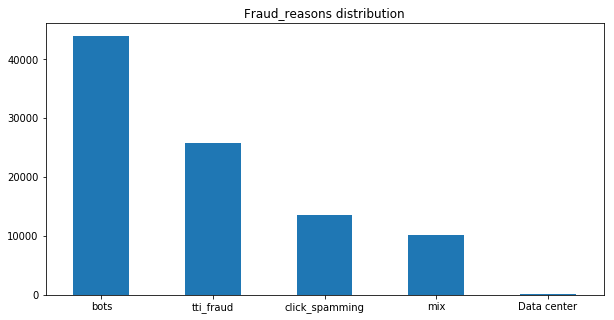

In [37]:
plot_distributions(labels, 'Fraud_reasons')

In [14]:
(labels['Fraud_reasons'] == 'Data center').sum()

102

### Almost all are android app installs

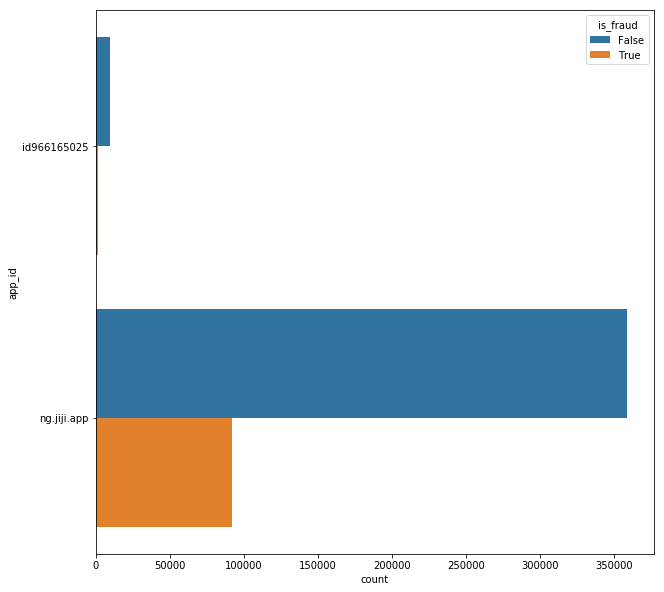

In [38]:
plot_countplot_per_is_fraud(data, 'app_id')

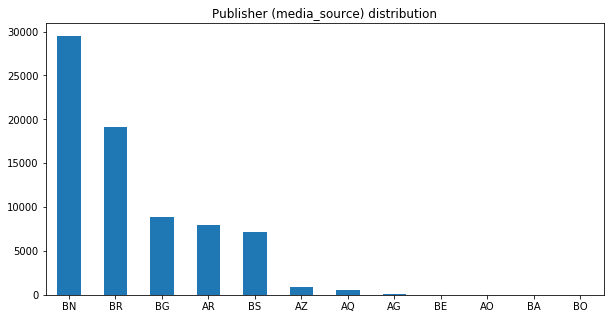

In [39]:
plot_distributions(labels, 'Publisher (media_source)')

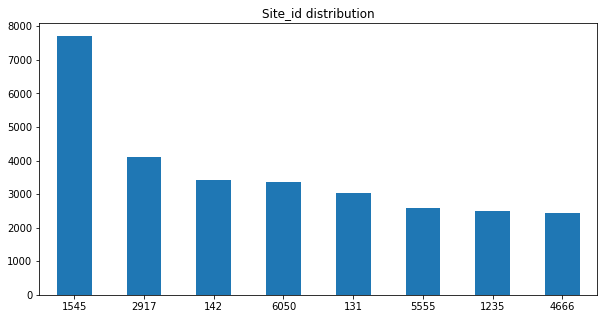

In [40]:
plot_distributions(labels, 'Site_id', 2000)

### The vast majority of installs are not via wifi

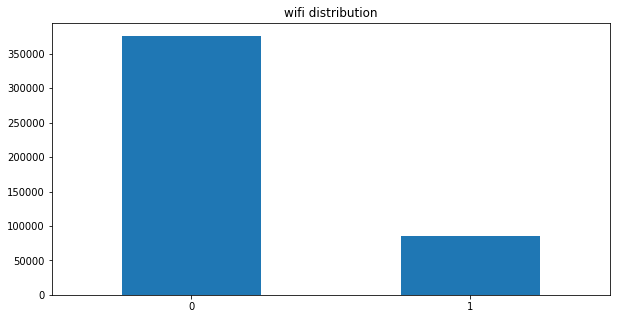

In [41]:
plot_distributions(data, 'wifi')

### If the install is via wifi it is just 25% less likely that it is a fraud

,is_fraud
wifi,
0,0.178389
1,0.747138


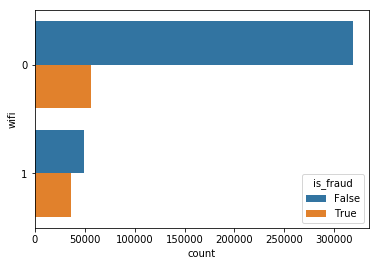

In [42]:
ax = sns.countplot(y='wifi', hue='is_fraud', data=data)
data.groupby('wifi').agg({'is_fraud': lambda x: x.sum()/(~x).sum()})

### There are some app versions that have 50% percent fraud installs

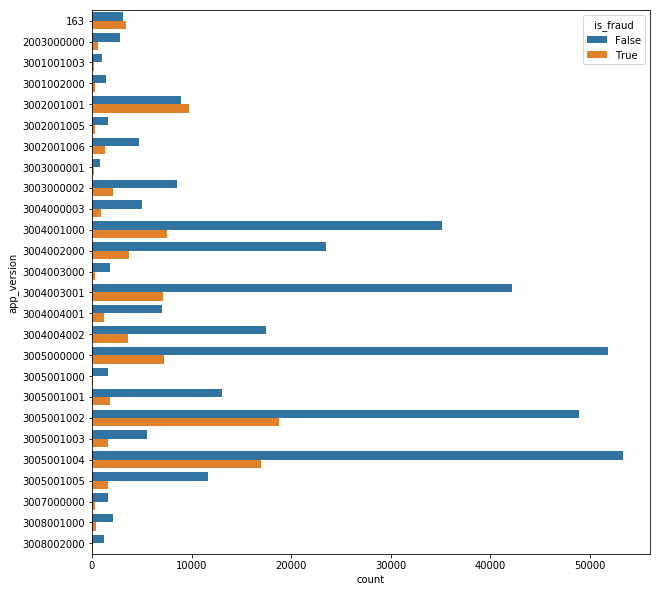

In [43]:
app_version_value_counts = data['app_version'].value_counts()
plt.figure(figsize=(10,10))
ax = sns.countplot(y='app_version', hue='is_fraud', data=data[
    data['app_version'].isin(app_version_value_counts[app_version_value_counts > 1000].index.values)])

### All frauds are have attributed_touch_type = click

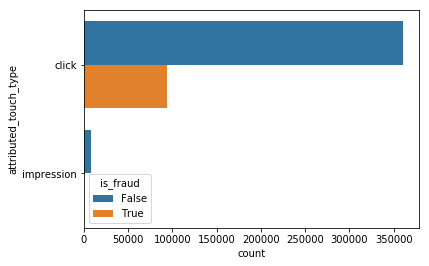

In [44]:
ax = sns.countplot(y='attributed_touch_type', hue='is_fraud', data=data)

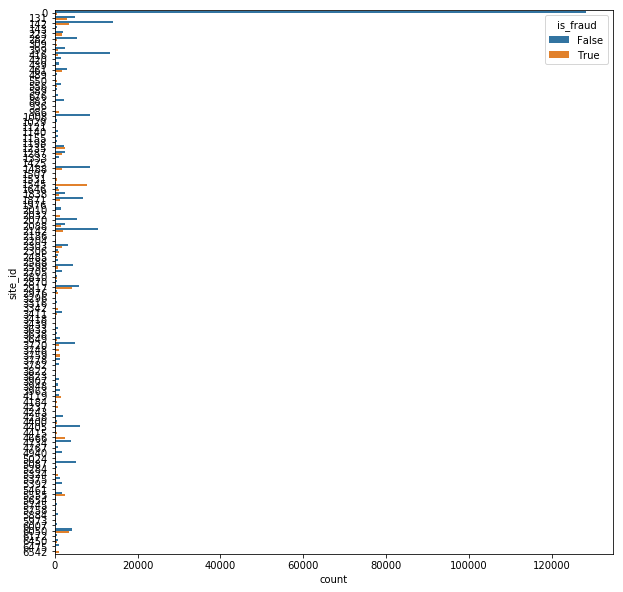

In [45]:
plot_countplot_per_is_fraud(data, 'site_id', min_limit=500)

### There is no really fraud operators

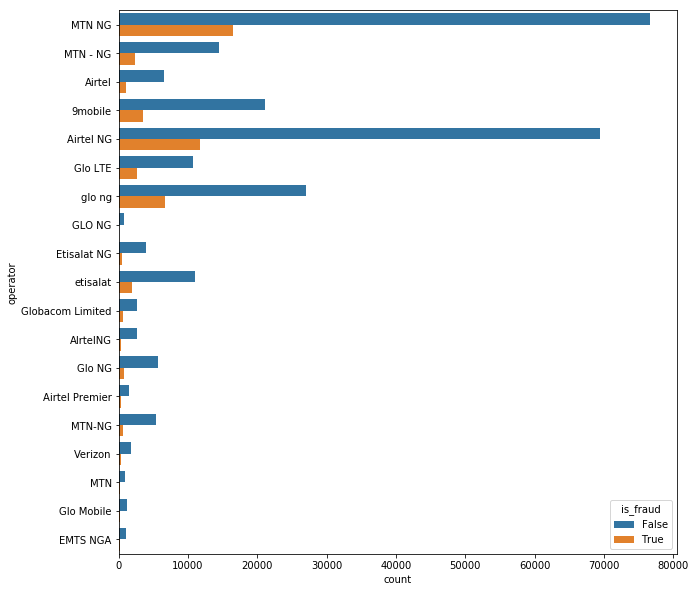

In [46]:
plot_countplot_per_is_fraud(data, 'operator', min_limit=500)

### There are languages that  are used only in fraud

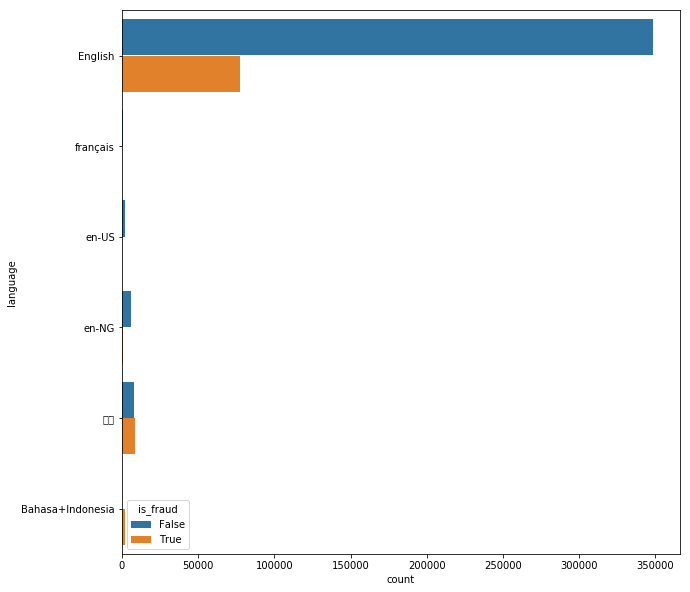

In [47]:
plot_countplot_per_is_fraud(data, 'language', min_limit=1000)

### Sdk version distribution

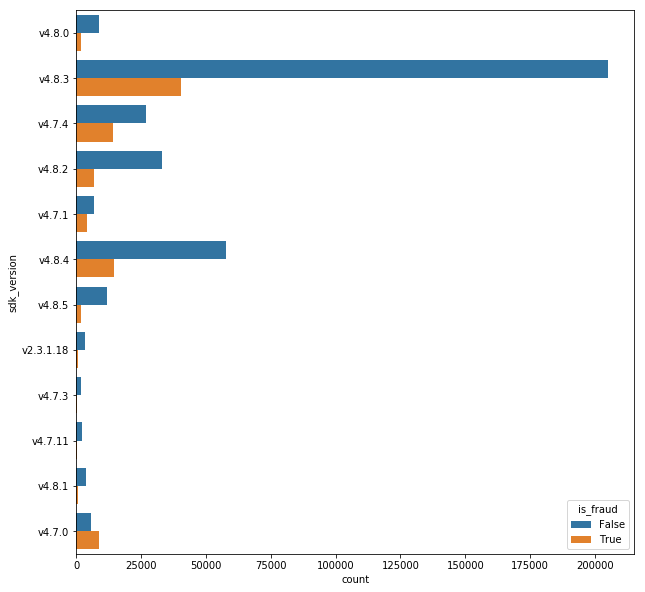

In [48]:
plot_countplot_per_is_fraud(data, 'sdk_version', min_limit=1000)

### OS version distribution

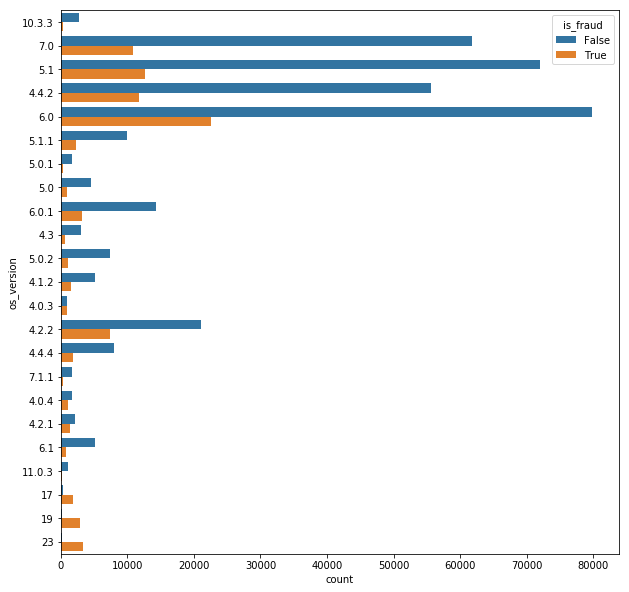

In [49]:
plot_countplot_per_is_fraud(data, 'os_version', min_limit=1000)

### All the traffic actually comes from NG

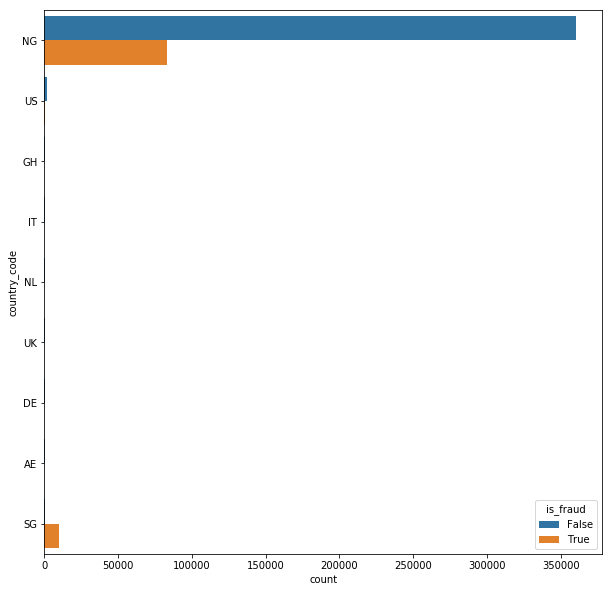

In [50]:
    plot_countplot_per_is_fraud(data, 'country_code', min_limit=200) 

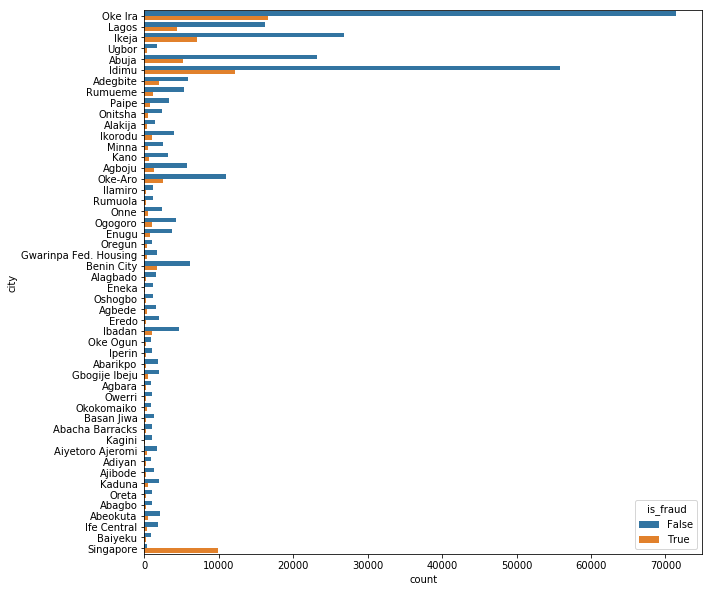

In [51]:
plot_countplot_per_is_fraud(data, 'city', min_limit=1000) 

### Publisher distribution

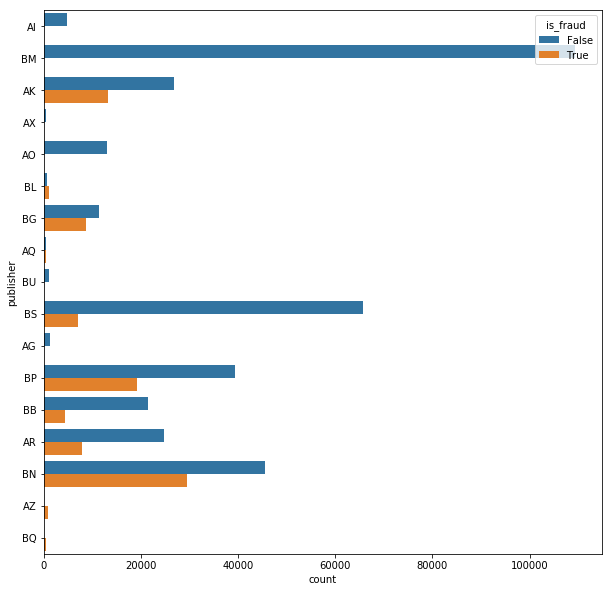

In [52]:
plot_countplot_per_is_fraud(data, 'publisher', min_limit=500) 

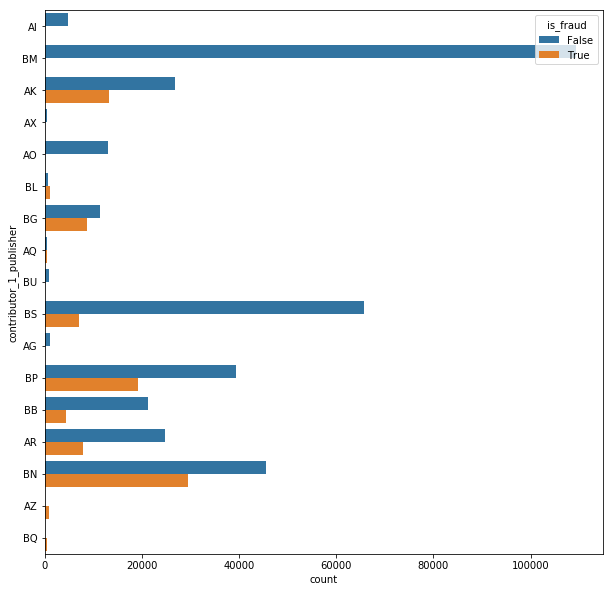

In [53]:
plot_countplot_per_is_fraud(data, 'contributor_1_publisher', min_limit=500)

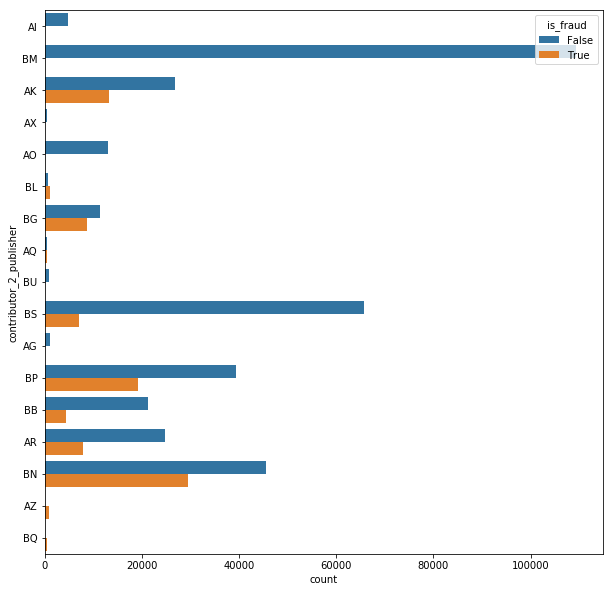

In [54]:
plot_countplot_per_is_fraud(data, 'contributor_2_publisher', min_limit=500)

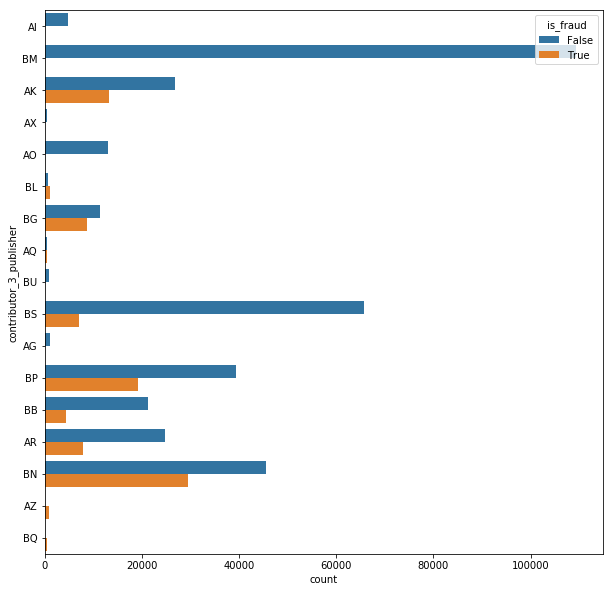

In [55]:
plot_countplot_per_is_fraud(data, 'contributor_3_publisher', min_limit=500)

### Distributions of sec_touch_install

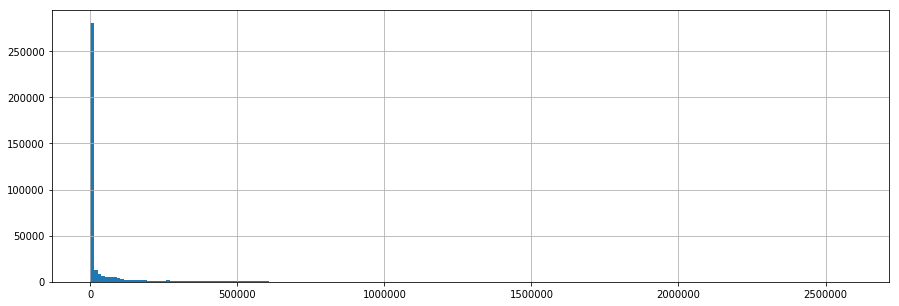

In [58]:
plt.figure(figsize=(15,5))
data[~data['is_fraud']]['tti'].hist(bins=200)

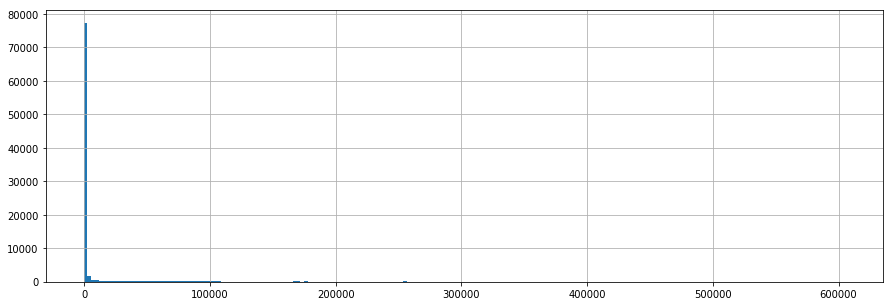

In [59]:
plt.figure(figsize=(15,5))
data[data['is_fraud']]['tti'].hist(bins=200)

(0, 200)

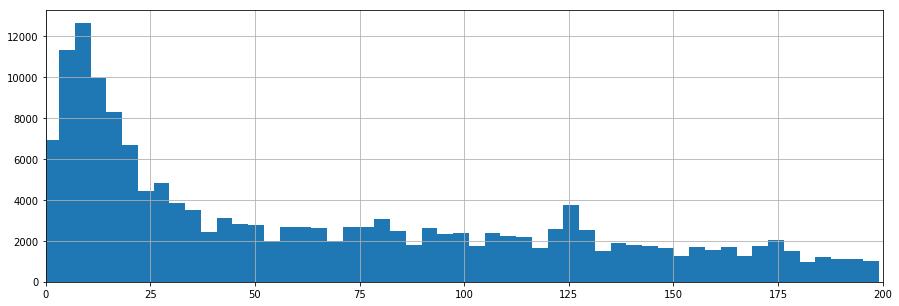

In [60]:
plt.figure(figsize=(15,5))
data[(~data['is_fraud']) & (data['tti'] < 200)]['tti'].hist(bins=200)
plt.xlim(0, 200)

(0, 200)

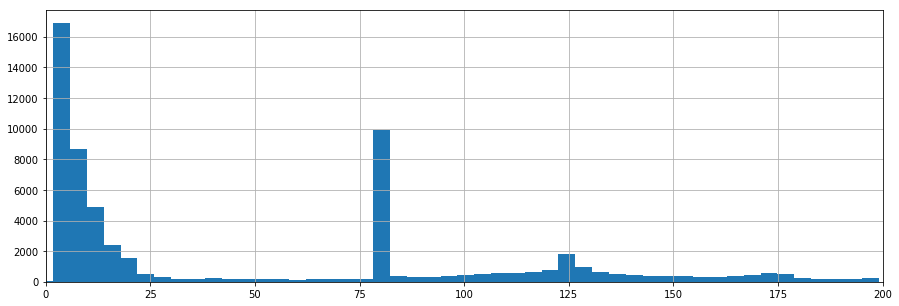

In [61]:
plt.figure(figsize=(15,5))
data[(data['is_fraud']) & (data['tti'] < 200)]['tti'].hist(bins=200)
plt.xlim(0, 200)

(0, 60)

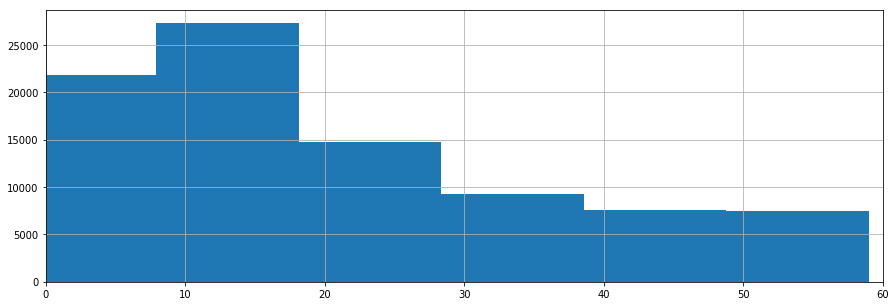

In [62]:
plt.figure(figsize=(15,5))
data[(~data['is_fraud']) & (data['tti'] < 60)]['tti'].hist(bins=60)
plt.xlim(0, 60)

(0, 60)

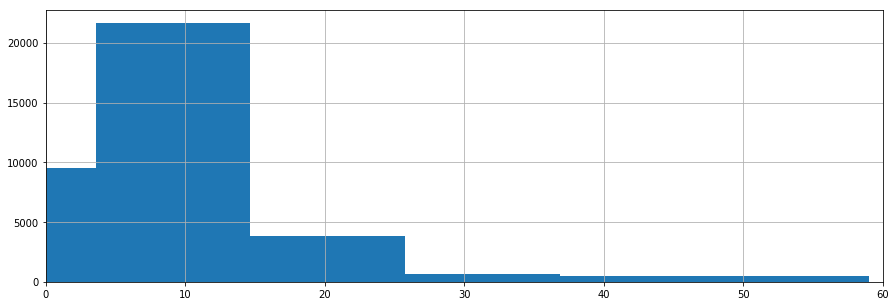

In [63]:
plt.figure(figsize=(15,5))
data[(data['is_fraud']) & (data['tti'] < 60)]['tti'].hist(bins=60)
plt.xlim(0, 60)

### TTI distribution per fraud

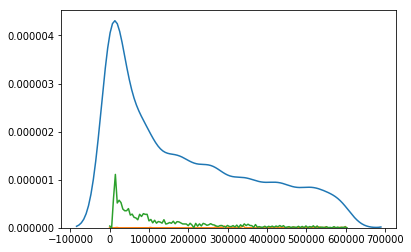

In [122]:
sns.distplot(data[(data['Fraud_reasons'] == 'click_spamming')][['tti']].values, hist=False, kde=True)
sns.distplot(data[(data['Fraud_reasons'] == 'tti_fraud')][['tti']].values, hist=False, kde=True)
sns.distplot(data[(data['Fraud_reasons'] == 'bots')][['tti']].values, hist=False, kde=True)


# sns.distplot(data[(data['Fraud_reasons'] == 'tti_fraud')]['tti'], hist=False, rug=True)
# sns.distplot(data[(data['Fraud_reasons'] == 'bots')]['tti'], hist=False, rug=True)


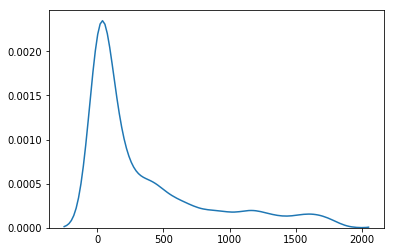

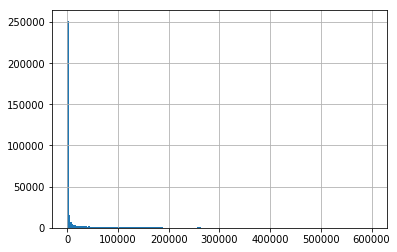

In [79]:
data[(~data['is_fraud']) & (data['tti'] < 600000)]['tti'].hist(bins=200)

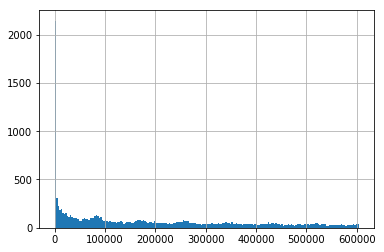

In [74]:
data[(data['Fraud_reasons'] == 'click_spamming')]['tti'].hist(bins=200)

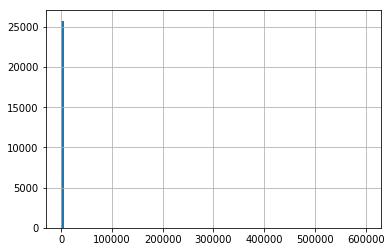

In [85]:
data[(data['Fraud_reasons'] == 'tti_fraud')]['tti'].hist(bins=100)

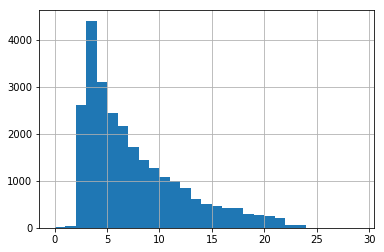

In [130]:
data[(data['Fraud_reasons'] == 'tti_fraud') & (data['tti'] < 30)]['tti'].hist(bins=range(0, 30))

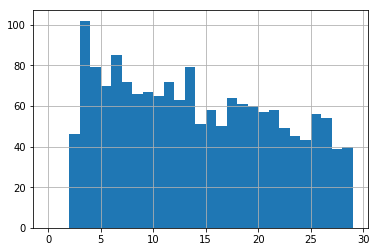

In [131]:
data[(data['Fraud_reasons'] == 'bots') & (data['tti'] < 30)]['tti'].hist(bins=range(0, 30))

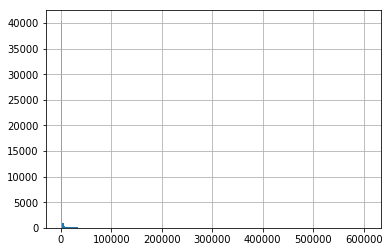

In [132]:
data[(data['Fraud_reasons'] == 'bots')]['tti'].hist(bins=200)

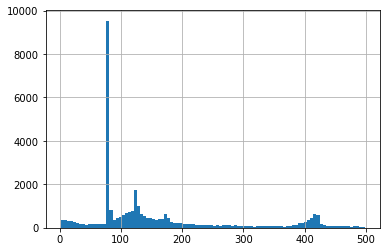

In [146]:
data[(data['Fraud_reasons'] == 'bots') & (data['tti'] < 500)]['tti'].hist(bins=100)

(0, 500)

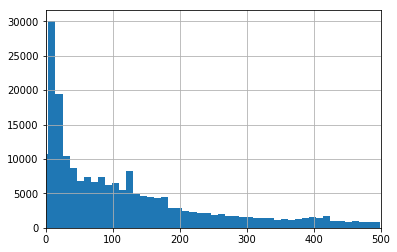

In [148]:
data[(~data['is_fraud']) & (data['tti'] < 500)]['tti'].hist(bins=100)
plt.xlim(0, 500)

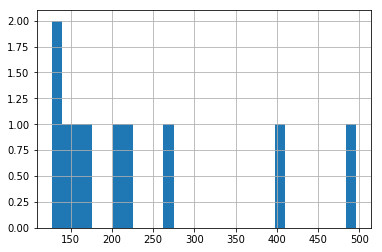

In [13]:
data[(data['Fraud_reasons'] == 'Data center') & (data['tti'] < 500)]['tti'].hist(bins=30)

### Distribution over the observed period

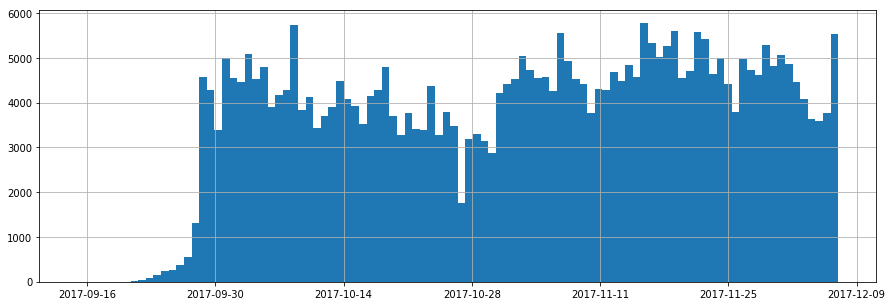

In [64]:
plt.figure(figsize=(15,5))
data[~data['is_fraud']]['attributed_touch_time'].hist(bins=100)

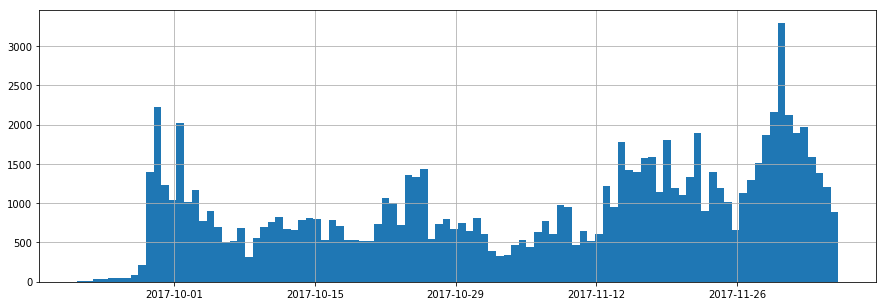

In [65]:
plt.figure(figsize=(15,5))
data[data['is_fraud']]['attributed_touch_time'].hist(bins=100)

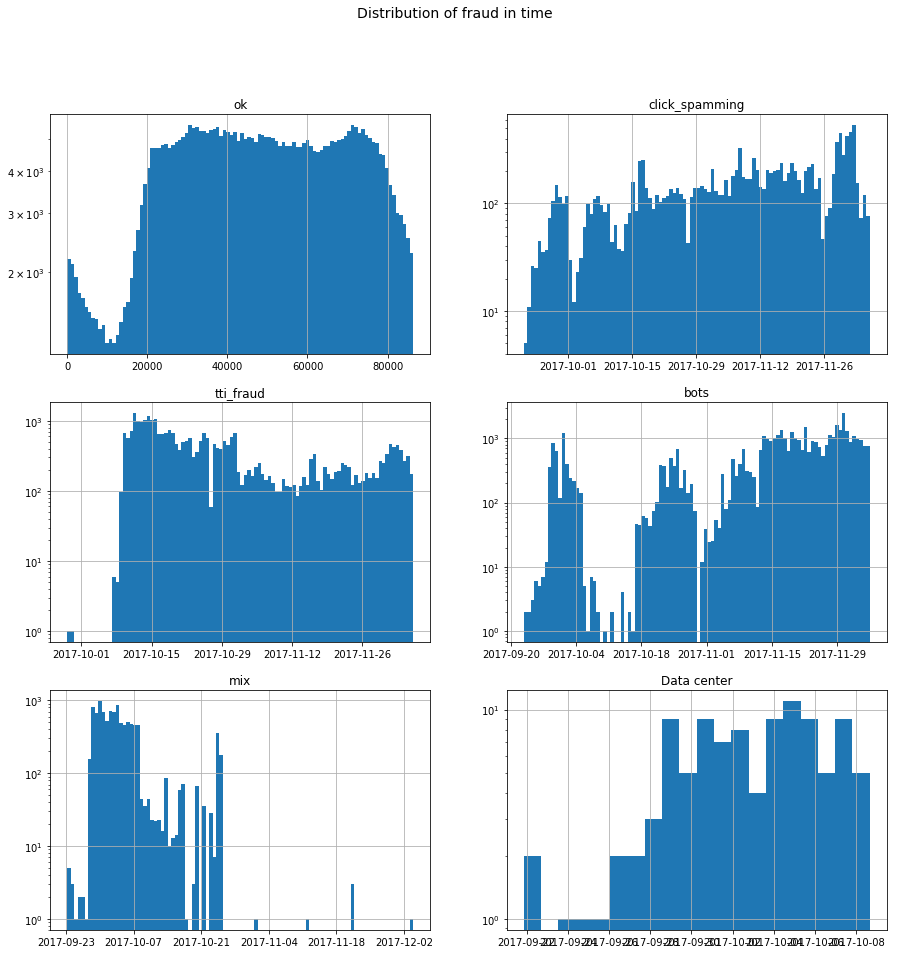

In [112]:
fig, ax = plt.subplots(figsize=(15,15))
fig.suptitle('Distribution of fraud in time', fontsize=14)
plt.subplot(321)
data[data['Fraud_reasons'].isnull()]['install_time_since_midnight_sec'].hist(bins=100, log=True)
plt.gca().set_title('ok')
plt.subplot(322)
data[data['Fraud_reasons'] == 'click_spamming']['attributed_touch_time'].hist(bins=100, log=True)
plt.gca().set_title('click_spamming')
plt.subplot(323)
data[data['Fraud_reasons'] == 'tti_fraud']['attributed_touch_time'].hist(bins=100, log=True)
plt.gca().set_title('tti_fraud')
plt.subplot(324)
data[data['Fraud_reasons'] == 'bots']['attributed_touch_time'].hist(bins=100, log=True)
plt.gca().set_title('bots')
plt.subplot(325)
data[data['Fraud_reasons'] == 'mix']['attributed_touch_time'].hist(bins=100, log=True)
plt.gca().set_title('mix')
plt.subplot(326)
data[data['Fraud_reasons'] == 'Data center']['attributed_touch_time'].hist(bins=20, log=True)
plt.gca().set_title('Data center')

### Distribution during the day

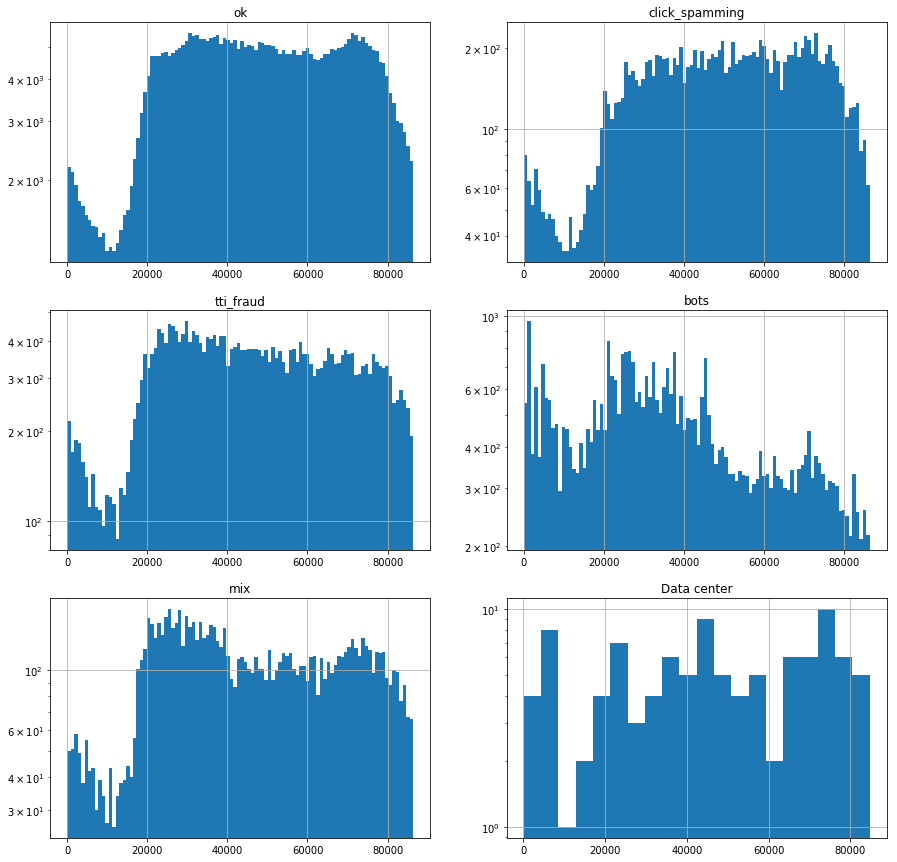

In [111]:
plt.figure(figsize=(15,15))
plt.subplot(321)
data[data['Fraud_reasons'].isnull()]['install_time_since_midnight_sec'].hist(bins=100, log=True)
plt.gca().set_title('ok')
plt.subplot(322)
data[data['Fraud_reasons'] == 'click_spamming']['install_time_since_midnight_sec'].hist(bins=100, log=True)
plt.gca().set_title('click_spamming')
plt.subplot(323)
data[data['Fraud_reasons'] == 'tti_fraud']['install_time_since_midnight_sec'].hist(bins=100, log=True)
plt.gca().set_title('tti_fraud')
plt.subplot(324)
data[data['Fraud_reasons'] == 'bots']['install_time_since_midnight_sec'].hist(bins=100, log=True)
plt.gca().set_title('bots')
plt.subplot(325)
data[data['Fraud_reasons'] == 'mix']['install_time_since_midnight_sec'].hist(bins=100, log=True)
plt.gca().set_title('mix')
plt.subplot(326)
data[data['Fraud_reasons'] == 'Data center']['install_time_since_midnight_sec'].hist(bins=20, log=True)
plt.gca().set_title('Data center')

In [68]:
data[data['tti'] == 0]['is_fraud'].value_counts()

False    251
True      15
Name: is_fraud, dtype: int64

In [69]:
data[data['tti'] > (3600 * 24)]['is_fraud'].value_counts()

False    45655
True      9275
Name: is_fraud, dtype: int64

In [7]:

(data[trustworthy_publisher_marker]['tti'] > (3600 * 24)).sum()/trustworthy_publisher_marker.sum()

0.12459371614301191

In [71]:
(data[~trustworthy_publisher_marker]['tti'] > (3600 * 24)).sum()/(~trustworthy_publisher_marker).sum()

0.1190025540950367

In [72]:
trustworthy_publisher_marker.sum()/len(trustworthy_publisher_marker)

0.0040000000000000001

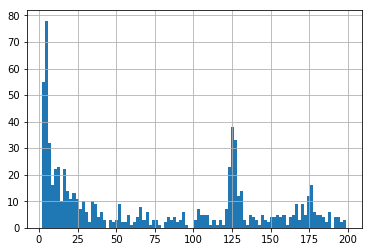

In [110]:
data[trustworthy_publisher_marker & (data['tti'] < 200)]['tti'].hist(bins=100)
# plt.xlim(0, 500)

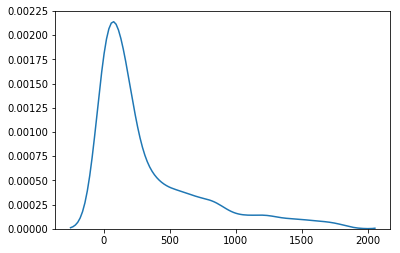

In [135]:
sns.distplot(data[trustworthy_publisher_marker & (data['tti'] < 3600 * 0.5) ][['tti']].values, hist=False, kde=True)

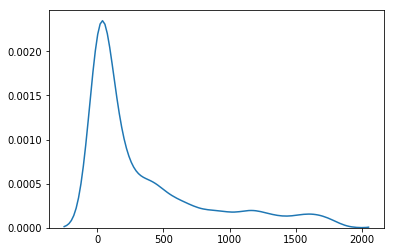

In [136]:
sns.distplot(data[(data['Fraud_reasons'] == 'click_spamming') & (data['tti'] < 3600 * 0.5) ][['tti']].values, hist=False, kde=True)
tti_fraud

In [6]:
def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma

def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)


In [7]:
trustworthy_publisher_marker = (data['publisher'] == 'AX') | (data['publisher'] == 'AG')
features = ['tti']
ok_mu, ok_sigma = estimateGaussian(
    data.loc[trustworthy_publisher_marker, features])
click_spamming_mu, click_spamming_sigma = estimateGaussian(
    data.loc[data['Fraud_reasons'] == 'click_spamming', features])
bots_mu, bots_sigma = estimateGaussian(
    data.loc[data['Fraud_reasons'] == 'bots', features])
tti_fraud_mu, tti_fraud_sigma = estimateGaussian(
    data.loc[data['Fraud_reasons'] == 'tti_fraud', features])
mix_mu, mix_sigma = estimateGaussian(
    data.loc[data['Fraud_reasons'] == 'mix', features])
data_center_mu, data_center_sigma = estimateGaussian(
    data.loc[data['Fraud_reasons'] == 'Data center', features])

data['p_ok'] = multivariateGaussian(data[features],
                                    ok_mu, ok_sigma)
data['p_click_spamming'] = multivariateGaussian(data[features],
                                                click_spamming_mu, click_spamming_sigma)
data['p_bots'] = multivariateGaussian(data[features],
                                      bots_mu, bots_sigma)
data['p_tti_fraud'] = multivariateGaussian(data[features],
                                           tti_fraud_mu, tti_fraud_sigma)
data['p_mix'] = multivariateGaussian(data[features],
                                     mix_mu, mix_sigma)
data['p_data_center'] = multivariateGaussian(data[features],
                                             data_center_mu, data_center_sigma)

In [ ]:
np.mean(data[['tti', 'install_time_since_midnight_sec']], axis=0)

In [28]:
ok_sigma

array(13470127832.930979)

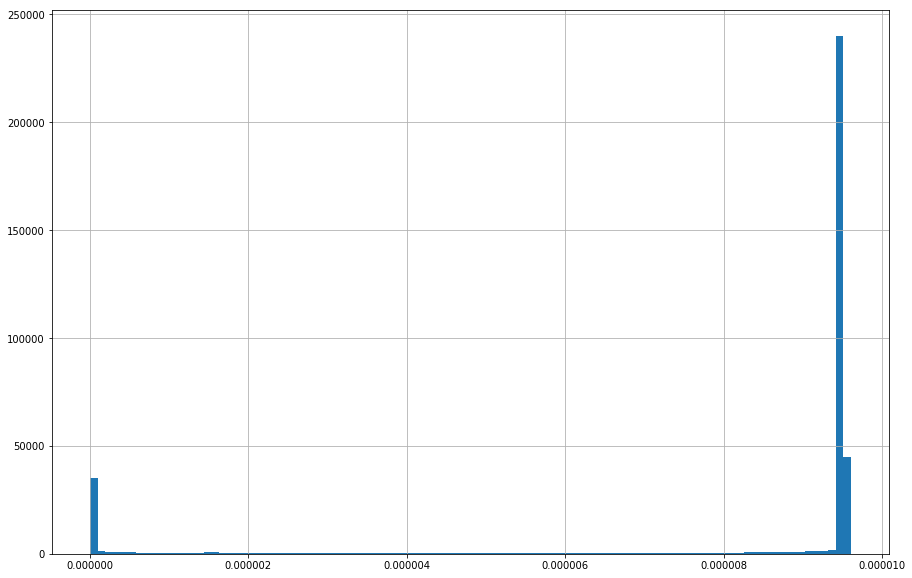

In [19]:
plt.figure(figsize=(15,10))
data[data['Fraud_reasons'].isnull()]['p_bots'].hist(bins=100)

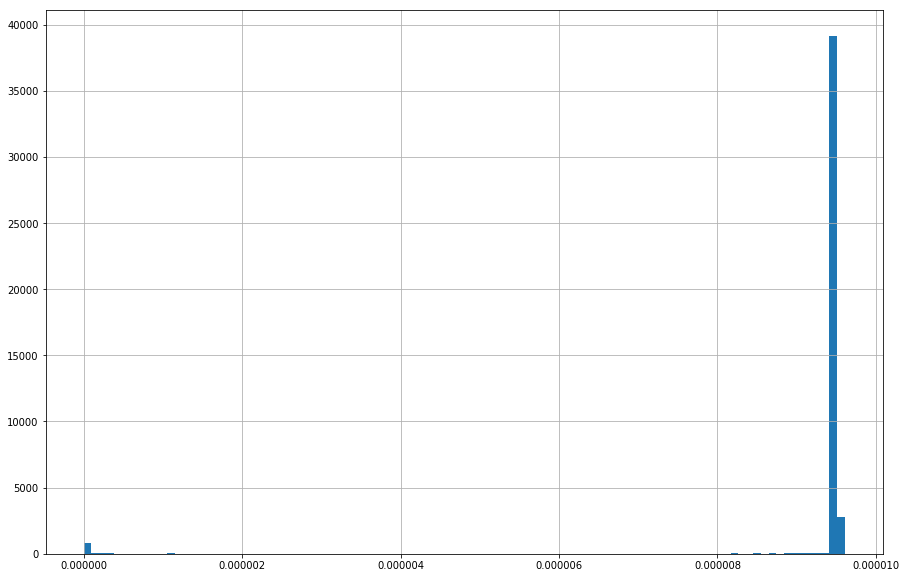

In [18]:
plt.figure(figsize=(15,10))
data[data['Fraud_reasons'] == 'bots']['p_bots'].hist(bins=100)

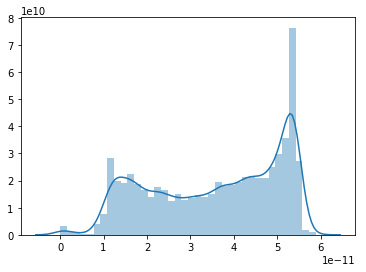

In [23]:
sns.distplot(p_bots)

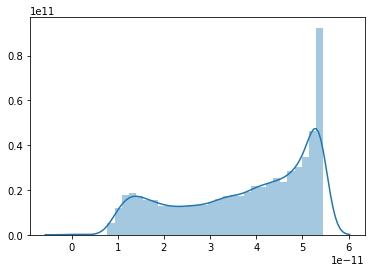

In [24]:
sns.distplot(p_tti_fraud)